# Assignment 2

## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [1]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

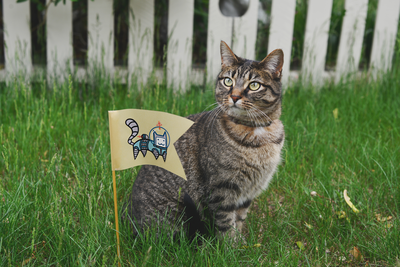

In [2]:
cat_img

In [3]:
cat_img.show()

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [4]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [5]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

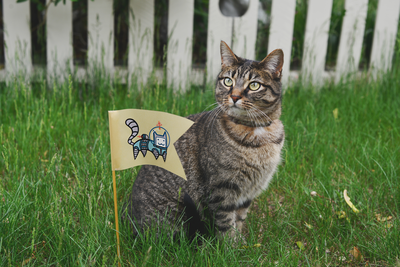

In [6]:
as_image(cat)

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [7]:
print ('The cat array has %d dimensions' % cat.ndim) 
print (cat.shape) 
print (cat[0,0,:])

The cat array has 3 dimensions
(267, 400, 3)
[29 29 27]


There are three dimensions of the __cat__ array. The first and second dimensions represent to the position of each pixel. The third dimension tells us the intensity of red, green, and blue at a specific pixel. For example, cat[0,0,:] returns a list containing the intensity of red, green and blue at the very first pixel.

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

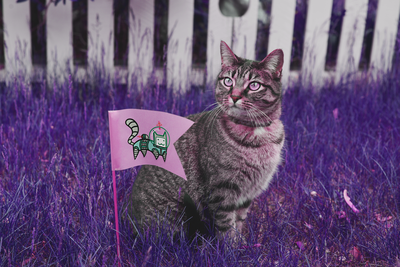

In [8]:
# Approach 1
cat2 = cat.copy()

def approach_1 (cat):
    """Swap the green and blue color channels in an Image.
    
    Args:
        cat (ndarray): The array of pixels.
        
    Returns:
        cat: The Image object after swapping.
    """
    for i in range(cat.shape[0]):
        for j in range(cat.shape[1]):
            cat[i,j,1], cat[i,j,2] = cat[i,j,2], cat[i,j,1] # Swap the green and blue color channels.
    return cat

as_image(approach_1(cat2))

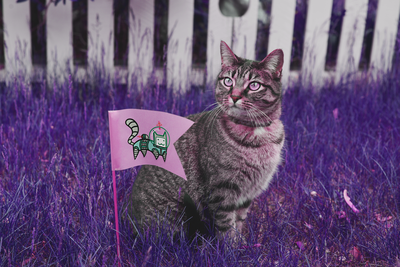

In [9]:
# Approach 2
def approach_2(cat):
    """Swap the green and blue color channels in an Image.
    
    Args:
        cat (ndarray): The array of pixels.
        
    Returns:
        cat2 (ndarray): The Image object after swapping.
    """
    cat2 = cat.copy()
    cat2[:,:,1], cat2[:,:,2] = cat[:,:,2], cat[:,:,1] # Swap the green and blue color channels.
    return cat2
        
as_image(approach_2(cat))

In [10]:
# compare the two approaches
%timeit approach_1(cat)
%timeit approach_2(cat)

10 loops, best of 3: 82.4 ms per loop
10000 loops, best of 3: 173 µs per loop


From the comparison above, it can be seen that the __for-loop__ approach is much slower, almost slower in $10^{2}$ magnitude. 

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

Initially, I thought `.copy()` is actually not necessary, because the swapping can be done by using the original cat array in my __Approach_1__. However, if I optimize my code by using __Approach_2__, which is much faster, the `.copy()` would become necessary so that we can do the swapping. If there was no `.copy()` step, like below, it can be easily seen that there is something wrong with the resulting image.

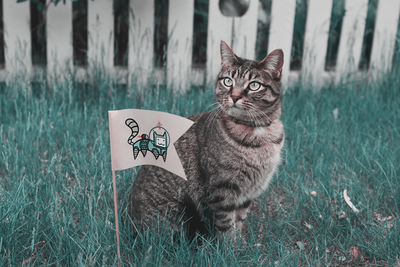

In [11]:
cat3 = cat.copy() # here the usage of .copy() is because I don't want to overwrite my original cat array.

cat3[:,:,1], cat3[:,:,2] = cat3[:,:,2], cat3[:,:,1] # Swap the green and blue color channels.

as_image(cat3)

So what is wrong?

In [12]:
# Check if the swapping has been done as we expected
print (sum(cat3[:,:,2] == cat[:,:,1]))
print (sum(cat3[:,:,1] == cat[:,:,2]))

[ 3  1  9 12  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  3  5  7 19 12  2  0  0  0  0  1  0  2  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0
  0  1  0  0  0  2  4  4  3 15  4 10  9  9 12  8  6  6  8  8  3  6  4  2  5
  5  2  2  3  3  6  7  2  1  3  3  5  7  8  5  6  3  2  1  1  2  2  5  2  1
  2  0  3  1  2  1  2  1  0  3  6  7  9  9 10 13  9  7 17 10  7  7  9 11  4
  4  9  5  9  8  7  9  1  1  3  5  5  5  3  3  6  4  5  2  5  3  3  2  7  3
  1  2  4  1  3  6  5  5  3  3  3  3  4  6  7  3  4  2  4  4  0  6  3  0  0
  1  1  2  0  0  1  1  1  8  4  5  3  3  1  3  1  1  0  0  1  2  2  1  5  2
  1  1  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

So actually, the swapping is not successful. The new __cat3__ array only get the intensity of blue of __cat__ as its intensity of green. But the blue of __cat3__ remains unchanged.

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

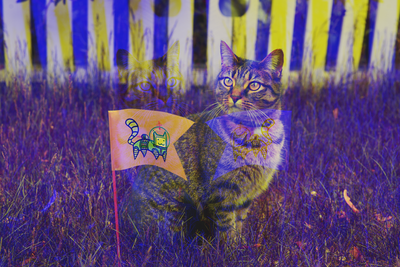

In [13]:
cat2 = cat.copy()
for i in range(cat2.shape[0]):
    for j in range(cat2.shape[1]):
        cat2[i,j,2] = cat[i,cat2.shape[1] - 1 - j, 2] # Flip the blue color channel from left to right
        
as_image(cat2)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [14]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 1x2 because NumPy only returns the diagonal of D.
print ("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [23]:
# Define a function that takes a matrix X and an integer q as inputs
#      returns the principal component matrix and basis matrix of X 
def svd_pricom_bas(X, q):
    """Define a function that computes the principal component matrix and basis matrix
    
    Args:
        X (ndarray): An array.
        q (integer): A number which tells how many terms to get into the approximation
        
    Returns:
        bas_mat (ndmatrix): The basis matrix
        pricom_mat (ndmatrix): The principal component matrix
    """
    u, d, vt = np.linalg.svd(X) # Singular value decompostion
    bas_mat = vt[:q,:]
    pricom_mat = np.matrix(X) * np.matrix(bas_mat.T)
    return bas_mat, pricom_mat

result = svd_pricom_bas(x, 2)
print ("The principal component matrix XVq is:\n", result[1], "\nthe basis matrix VTq is:\n", result[0])

The principal component matrix XVq is:
 [[-3.0867458  -1.86333045]
 [-3.31509197  1.73498277]] 
the basis matrix VTq is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]]


In [22]:
def apprx_matrix(pricom_mat, bas_mat):
    """Define a function that returns an approximation for the original matrix
    
    Args:
        bas_mat (ndmatrix): The basis matrix
        pricom_mat (ndmatrix): The principal component matrix
        
    Returns:
        est_X (ndmatrix): The estimation of original matrix
    """
    est_X = pricom_mat * bas_mat # compute the estimation by doing multiplication between the principle component matrix and basis matrix
    return est_X

result = apprx_matrix(svd_pricom_bas(x, 1)[1], svd_pricom_bas(x, 1)[0])
print ("The approximation of matrix\n",x, "\n is:\n", result)

The approximation of matrix
 [[0 2 3]
 [3 2 1]] 
 is:
 [[ 1.49618805  1.92621165  1.89185877]
 [ 1.60687057  2.06870575  2.03181157]]


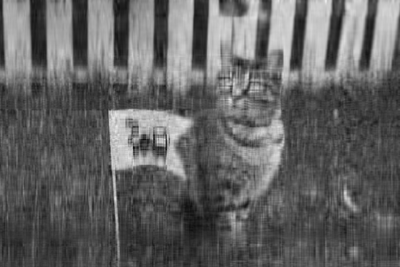

In [17]:
def reduced_red(ori_image, r):
    """Define a function that returns an approximation for the original ndarray of an image
    
    Args:
        ori_image (ndarray): The original ndarray of an image
        r (integer): A number which tells how many terms to get into the approximation
        
    Returns:
        newimage_red_reduced (ndmatrix): The matrix representing the reduced red color channel of the original image
    """    
    newimage = ori_image.copy() # copy the original image to a new image
    newimage_red = newimage[:,:,0] # extract the red channel
    newimage_red_reduced = apprx_matrix(svd_pricom_bas(newimage_red, r)[1], svd_pricom_bas(newimage_red, r)[0]) # reduced the red channel
    
    return newimage_red_reduced

as_image(reduced_red(cat, 400))
as_image(reduced_red(cat, 200))
as_image(reduced_red(cat, 100))
as_image(reduced_red(cat, 50)) # still ok
as_image(reduced_red(cat, 25)) # not very clear but still ~ok
as_image(reduced_red(cat, 10)) # the body of cat is not clear

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [24]:
ori_bytes = reduced_red(cat, 400).nbytes
print("The red channel of the original cat image uses %d bytes" % ori_bytes)

compressed_bytes = svd_pricom_bas(cat[:,:,0], 10)[0].nbytes + svd_pricom_bas(cat[:,:,0], 10)[1].nbytes
print("The red channel of the compressed cat image uses %d bytes" % compressed_bytes)

print("The red channel of the compressed cat image uses %.2f%% bytes of the original image" % 
      (compressed_bytes/ori_bytes*100))

The red channel of the original cat image uses 854400 bytes
The red channel of the compressed cat image uses 53360 bytes
The red channel of the compressed cat image uses 6.25% bytes of the original image


In [19]:
print (cat.nbytes)
print (cat.dtype)
print (reduced_red(cat, 400).dtype)

320400
uint8
float64


If we print out the bytes needed to store cat, it is 320400. Actually this value is smaller than 854400. The reason is that the data type has changed during the processing.
<p>Another interesting finding is</p>

In [20]:
for i in range(0,401,25):
    print ('q = %d' % i, "The red channel of the compressed cat image uses %d bytes\n" % 
           (svd_pricom_bas(cat[:,:,0], i)[0].nbytes + svd_pricom_bas(cat[:,:,0], i)[1].nbytes))

q = 0 The red channel of the compressed cat image uses 0 bytes

q = 25 The red channel of the compressed cat image uses 133400 bytes

q = 50 The red channel of the compressed cat image uses 266800 bytes

q = 75 The red channel of the compressed cat image uses 400200 bytes

q = 100 The red channel of the compressed cat image uses 533600 bytes

q = 125 The red channel of the compressed cat image uses 667000 bytes

q = 150 The red channel of the compressed cat image uses 800400 bytes

q = 175 The red channel of the compressed cat image uses 933800 bytes

q = 200 The red channel of the compressed cat image uses 1067200 bytes

q = 225 The red channel of the compressed cat image uses 1200600 bytes

q = 250 The red channel of the compressed cat image uses 1334000 bytes

q = 275 The red channel of the compressed cat image uses 1467400 bytes

q = 300 The red channel of the compressed cat image uses 1600800 bytes

q = 325 The red channel of the compressed cat image uses 1734200 bytes

q = 350 Th

If we print out the bytes used for different $q$ value, it can be found that it is actually larger than 854400 starting from the case where $q \geqslant 175$.